<a href="https://colab.research.google.com/github/Tommmster/diplodatos-2022-g20/blob/main/entregable2_EyCD/EyCD_Entregable_Parte_2_g20_VersionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Exploración y Curación de Datos**

**Edición 2022**

---
## **Trabajo práctico entregable - Parte 2**
---

## **Grupo 20**

**Integrantes:** Fanny Ruales, Gastón Briozzo, Tomás Niño Kehoe

**Profesor de Práctico:** Alejandro García


En el ejercicio 2 de la parte 1 del entregable seleccionaron las filas y columnas relevantes al problema de predicción de precios de una propiedad e imputaron los valores faltantes de las columnas `Suburb` y las columnas obtenidas a partir del conjunto de datos `airbnb`.

En esta notebook, **se utilizará resultado de dichas operaciones.** que fue guardado en un archivo (Ejercicio 3 entregable 1). 


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn
seaborn.set_context('talk')

In [ ]:
# Acá se toma el DF obtenido del Entregable 1 ejercicio 2.
melb_df = pd.read_csv(
    'melb_data_extended.csv')
melb_df[:3]

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
0,Abbotsford,2,h,1480000.0,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,130.624031,605.152174,2187.032258
1,Abbotsford,2,h,1035000.0,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,130.624031,605.152174,2187.032258
2,Abbotsford,3,h,1465000.0,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,130.624031,605.152174,2187.032258


In [ ]:
melb_df.columns

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'airbnb_price_mean', 'airbnb_weekly_price_mean',
       'airbnb_monthly_price_mean'],
      dtype='object')

In [ ]:
#seteamos visualizacion 
pd.options.display.float_format = '{:.2f}'.format

pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Ejercicio de Imputacion
1. Imputar los valores faltantes de la columna CouncilArea en base a la información presente en Suburb. (Si en el punto anterior no seleccionó ninguna de estas variables, agréguelas ahora al conjunto de datos).
2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB


<font color='MediumBlue'>
Como sabemos CouncilArea es una variable categoria que informa los districtos a la que pertenece cada propiedad. Y podemos decir que cada districto posee su correspondiente codigo postal relacionado. Partiendo de esta premisa vamos a obtener los valores faltantes del dato CouncilArea para el desarrollo de este punto. 

In [ ]:
#Veamos cuantos nulos tiene CouncilArea y su proporcion con respecto al total
print('Cantidad de Registros: ', len(melb_df))
missing_values_count_CouncilArea=melb_df.CouncilArea.isnull().sum()
Proporcion = missing_values_count_CouncilArea/len(melb_df)
print('Proporcion de Nulos de CouncilArea: ', Proporcion)

Cantidad de Registros:  13518
Proporcion de Nulos de CouncilArea:  0.09668590028110667


In [ ]:
#Veamos cuales son las variables que presentan valores Nulos
missing_values_count=melb_df.isnull().sum()
missing_values_count[missing_values_count > 0]

BuildingArea                 6417
YearBuilt                    5344
CouncilArea                  1307
airbnb_price_mean              20
airbnb_weekly_price_mean      872
airbnb_monthly_price_mean    1265
dtype: int64

<font color='MediumBlue'> 
Como se puede apreciar el dato Postcode no presenta valores nulos lo cual nos permitira realizar la imputacion. Vamos a ver cuales son aquellos registros que poseen valores nulos en CouncilArea y su correspondiente Postcode, luego para aquellos Postcode buscaremos el CouncilArea respectivo.

In [ ]:
#Creamos una lista de aquellos Postcode cuyo CouncilArea sea nula y su correspondiente df
df_CouncilArea_Null = melb_df.loc[melb_df.CouncilArea.isna()]

CouncilArea_Null_List=(melb_df[melb_df.CouncilArea.isnull()]).Postcode.unique().tolist()

#obtenemos los CouncilArea no nulos de los Postcode obtenido anteriormente
df_melb_df_NotNull=melb_df[melb_df.CouncilArea.notna()]

df_CouncilArea_NotNull= df_melb_df_NotNull.loc[df_melb_df_NotNull.Postcode.isin(CouncilArea_Null_List)]

#creamos un diccionario con esos Postcode para luego imputarlos

diccionario = dict(zip(df_CouncilArea_NotNull.Postcode, df_CouncilArea_NotNull.CouncilArea))


In [ ]:
#Ahora haremos un diccionario con los índices con CouncilArea nula como primary key y con las CouncilAreas correspondientes como valores dados.

diccionario_reemplazo_CouncilArea = {}
for i in range(df_CouncilArea_Null.shape[0]):
  if df_CouncilArea_Null.iloc[i].Postcode in diccionario.keys():
    diccionario_reemplazo_CouncilArea.update({df_CouncilArea_Null.index[i]: diccionario[df_CouncilArea_Null.iloc[i].Postcode]})

len(diccionario_reemplazo_CouncilArea)


1304

In [ ]:
#hacemos copia del DF dado que reemplazaremos la columna 
melb_df_Backup=melb_df.copy(deep=False)

melb_df['CouncilArea'] = melb_df['CouncilArea'].fillna(diccionario_reemplazo_CouncilArea)


In [ ]:
#Veamos nuevamente cuales son las variables que presentan valores Nulos
missing_values_count=melb_df.isnull().sum()
missing_values_count[missing_values_count > 0]

BuildingArea                 6417
YearBuilt                    5344
CouncilArea                     3
airbnb_price_mean              20
airbnb_weekly_price_mean      872
airbnb_monthly_price_mean    1265
dtype: int64

<font color='MediumBlue'> 
como se puede apreciar solo queda 3 registros sin imputar veamos cuales son:

In [ ]:
CouncilArea_Null_ListNew=(melb_df[melb_df.CouncilArea.isnull()]).Postcode.unique().tolist()

CouncilArea_Null_ListNew

[3756.0, 3438.0, 3793.0]

In [ ]:
#Verificando la imputacion desde el reguardo se puede observar que esos 3 registros poseen Postcode unicos , sin CouncilArea.
# a su vez tambien la variable Suburb(barrio) posee valores unicos.
# con lo cual deberemos acudir a la web
 
melb_df_Backup[melb_df_Backup.Postcode.isin(CouncilArea_Null_ListNew)]

,Suburb,Rooms,Type,Price,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean
12831,Wallan,3,h,366000.00,3756.00,1.00,1.00,502.00,77.00,1978.00,NaN,-37.41,144.98,NaN,NaN,NaN
13198,New Gisborne,5,h,1355000.00,3438.00,3.00,5.00,44500.00,44515.00,NaN,NaN,-37.45,144.59,NaN,NaN,NaN
13437,Monbulk,4,h,720000.00,3793.00,2.00,2.00,1611.00,NaN,NaN,NaN,-37.88,145.41,126.88,NaN,NaN


<font color='MediumBlue'> 
Como se puede apreciar, estos registros no fueron imputados dado que no tuvieron otros Postcode con valores CouncilArea no nulos, tampoco podemos utilizar la variable Suburb dado que presenta la misma situacion que Postcode.
Buscando en la web obtuvimos lo siguiente:<br>
Para Suburb=Wallan - Postcode 3756 el CouncilArea es **Mitchell** <br>https://data.gov.au/search?organisation=Mitchell%20Shire%20Council<br> Para Suburb= New Gisborne - Postcode 3438 el CouncilArea es **Shire of Macedon Ranges**<br>
https://data.gov.au/organisations/org-dga-6dedc5ae-02f3-4c38-bb9f-c4e2d028f7aa <br> Para Suburb= Monbulk - Postcode 3793 el CouncilArea es **Yarra Ranges** https://knowyourcouncil.vic.gov.au/councils/yarra-ranges<br><br>
Imputaremos esos valores

In [ ]:
melb_df.CouncilArea.iloc[12831]='Mitchell'
melb_df.CouncilArea.iloc[13198]='Shire of Macedon Ranges'
melb_df.CouncilArea.iloc[13437]='Yarra Ranges'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
#Volvamos a ver nuevamente cuales son las variables que presentan valores Nulos
missing_values_count=melb_df.isnull().sum()
missing_values_count[missing_values_count > 0]

BuildingArea                 6417
YearBuilt                    5344
airbnb_price_mean              20
airbnb_weekly_price_mean      872
airbnb_monthly_price_mean    1265
dtype: int64

2. Imputar los valores faltantes de la(s) columna(s) que se agregaron a partir del conjunto de datos de AirBnB

In [ ]:
#Veamos cuales son las variables de airburn que presentan valores Nulos
missing_values_count=melb_df.isnull().sum()
missing_values_count[missing_values_count > 0]

BuildingArea                 6417
YearBuilt                    5344
airbnb_price_mean              20
airbnb_weekly_price_mean      872
airbnb_monthly_price_mean    1265
dtype: int64

In [ ]:
#Veamos cuantos nulos tienen estas variables, nos centraremos solo en las de precios y su proporcion con respecto al total

print('Cantidad de Registros: ', len(melb_df))
Proporcion_airbnb_price_mean = melb_df.airbnb_price_mean.isnull().sum()/len(melb_df)
print('Proporcion de Nulos de airbnb_price_mean: ', Proporcion)
Proporcion_airbnb_weekly_price_mean = melb_df.airbnb_weekly_price_mean.isnull().sum()/len(melb_df)
print('Proporcion de Nulos de airbnb_weekly_price_mean: ', Proporcion)
Proporcion_airbnb_monthly_price_mean = melb_df.airbnb_monthly_price_mean.isnull().sum()/len(melb_df)
print('Proporcion de Nulos de airbnb_monthly_price_mean: ', Proporcion)

Cantidad de Registros:  13518
Proporcion de Nulos de airbnb_price_mean:  0.09668590028110667
Proporcion de Nulos de airbnb_weekly_price_mean:  0.09668590028110667
Proporcion de Nulos de airbnb_monthly_price_mean:  0.09668590028110667


In [ ]:
# veamos sus estadisticas
vars=['airbnb_weekly_price_mean', 'airbnb_price_mean', 'airbnb_monthly_price_mean']
melb_df[vars].describe()

,airbnb_weekly_price_mean,airbnb_price_mean,airbnb_monthly_price_mean
count,12646.00,13498.00,12253.00
mean,706.28,131.20,2616.55
std,339.13,64.31,1453.61
min,160.00,40.00,600.00
25%,469.87,94.67,1567.50
50%,609.75,114.61,2298.00
75%,920.08,147.73,3366.67
max,2236.67,759.08,10060.00


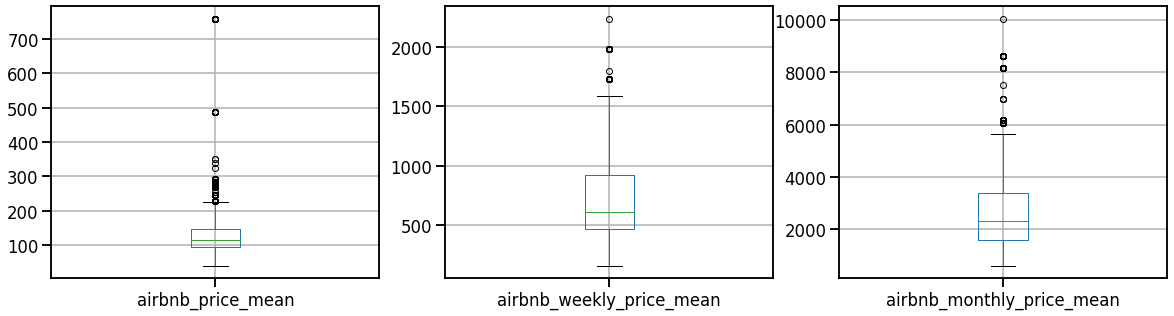

In [ ]:
# veamos como se encuentran distribuidos sus datos y sus outliers
fig, ax = plt.subplots(ncols=3, figsize=(20,5), sharey=False)
melb_df.boxplot(column='airbnb_price_mean', ax=ax[0] )
melb_df.boxplot(column='airbnb_weekly_price_mean', ax=ax[1] )
melb_df.boxplot(column='airbnb_monthly_price_mean', ax=ax[2] )

In [ ]:
#acorde a la grafica expuesta imputaremos por la mediana.

# imputing with median
mediana_price = melb_df['airbnb_price_mean'].median()
mediana_weekly_price = melb_df['airbnb_weekly_price_mean'].median()
mediana_monthly_price = melb_df['airbnb_monthly_price_mean'].median()

melb_df.airbnb_price_mean = melb_df.airbnb_price_mean.fillna(mediana_price)
melb_df.airbnb_weekly_price_mean = melb_df.airbnb_weekly_price_mean.fillna(mediana_weekly_price)
melb_df.airbnb_monthly_price_mean = melb_df.airbnb_monthly_price_mean.fillna(mediana_monthly_price)


In [ ]:
#Veamos nuevamente cuales son las variables de airburn que presentan valores Nulos
missing_values_count=melb_df.isnull().sum()
missing_values_count[missing_values_count > 0]

BuildingArea    6417
YearBuilt       5344
dtype: int64

## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, **excepto** `BuildingArea` y `YearBuilt`, que volveremos a imputar más adelante.

2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas. 
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


1.1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt, que volveremos a imputar más adelante.

In [ ]:
from sklearn.preprocessing import OneHotEncoder


In [ ]:

melb_data_backup1 = melb_df.copy(deep=True)
df = melb_df.drop(['BuildingArea', 'YearBuilt'], axis=1, inplace=False)



1.2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Suburb                     13518 non-null  object 
 1   Rooms                      13518 non-null  int64  
 2   Type                       13518 non-null  object 
 3   Price                      13518 non-null  float64
 4   Postcode                   13518 non-null  float64
 5   Bathroom                   13518 non-null  float64
 6   Car                        13518 non-null  float64
 7   Landsize                   13518 non-null  float64
 8   CouncilArea                13518 non-null  object 
 9   Lattitude                  13518 non-null  float64
 10  Longtitude                 13518 non-null  float64
 11  airbnb_price_mean          13518 non-null  float64
 12  airbnb_weekly_price_mean   13518 non-null  float64
 13  airbnb_monthly_price_mean  13518 non-null  flo

In [ ]:
vs = df.columns.to_series().groupby(df.dtypes).groups
vs

{int64: ['Rooms'], float64: ['Price', 'Postcode', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'airbnb_price_mean', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean'], object: ['Suburb', 'Type', 'CouncilArea']}

vs = df.columns.to_series().groupby(df.dtypes).groups
vs

protonumeric = np.append(vs[np.dtype('float64')].values, vs[np.dtype('int64')].values)
numeric = [n for n in protonumeric] 
numeric


categorical = vs[np.dtype('O')]

categorical


In [ ]:

protonumeric = np.append(vs[np.dtype('float64')].values, vs[np.dtype('int64')].values)
numeric = [n for n in protonumeric] 
numeric

['Price',
 'Postcode',
 'Bathroom',
 'Car',
 'Landsize',
 'Lattitude',
 'Longtitude',
 'airbnb_price_mean',
 'airbnb_weekly_price_mean',
 'airbnb_monthly_price_mean',
 'Rooms']

In [ ]:
categorical = vs[np.dtype('O')]

categorical

Index(['Suburb', 'Type', 'CouncilArea'], dtype='object')

In [ ]:
c_all = df.columns
c_cat = categorical
c_num = numeric

In [ ]:
df[c_cat].nunique()

Suburb         314
Type             3
CouncilArea     35
dtype: int64

In [ ]:
# verificamos cuantas variables categoricas son nulas
df[c_cat].isna().sum()

Suburb         0
Type           0
CouncilArea    0
dtype: int64

In [ ]:
#aplicamos OneHotEnconde , creamos un df para cada tipo de variable

df_cat = df[c_cat]
df_num = df[c_num]

#valores de las variables categoricas
categorias = [df_cat[col].value_counts().index.values for col in c_cat]

encoder = OneHotEncoder(categories=categorias, handle_unknown="ignore")
encoder.fit(df_cat)

et = encoder.transform(df_cat).toarray()#.todense()
#agregamos las columnas numericas
dat_enc = np.hstack([et, df_num])
#obtenemos la matriz 
dat_enc.shape


(13518, 363)

<font color='Blue'>En dat_enc estan todos los datos categoricos ya codificados, unidos con los datos numéricos del dataframe original. La única observación es que los datos están en formato matriz, no en un dataframe.

In [ ]:
#Creamos un dataframe a partir de la matriz generada
ohc = encoder.get_feature_names_out(df_cat.columns)
cols = np.append(ohc, df_num.columns)
oh_df = pd.DataFrame(dat_enc, columns = cols)

In [ ]:
dat_enc.shape

(13518, 363)

In [ ]:
name_columns=cols.tolist()

In [ ]:
print(name_columns)

['Suburb_Reservoir', 'Suburb_Richmond', 'Suburb_Bentleigh East', 'Suburb_Preston', 'Suburb_Brunswick', 'Suburb_Essendon', 'Suburb_South Yarra', 'Suburb_Glen Iris', 'Suburb_Coburg', 'Suburb_Hawthorn', 'Suburb_Brighton', 'Suburb_Northcote', 'Suburb_Kew', 'Suburb_Balwyn North', 'Suburb_Pascoe Vale', 'Suburb_Yarraville', 'Suburb_St Kilda', 'Suburb_Glenroy', 'Suburb_Port Melbourne', 'Suburb_Moonee Ponds', 'Suburb_Carnegie', 'Suburb_Bentleigh', 'Suburb_Thornbury', 'Suburb_Brighton East', 'Suburb_Newport', 'Suburb_Camberwell', 'Suburb_Footscray', 'Suburb_Hampton', 'Suburb_Elwood', 'Suburb_Ascot Vale', 'Suburb_Surrey Hills', 'Suburb_Prahran', 'Suburb_Keilor East', 'Suburb_Hawthorn East', 'Suburb_Kensington', 'Suburb_Malvern East', 'Suburb_Doncaster', 'Suburb_Sunshine', 'Suburb_Brunswick West', 'Suburb_Balwyn', 'Suburb_Williamstown', 'Suburb_West Footscray', 'Suburb_Fawkner', 'Suburb_Toorak', 'Suburb_Ivanhoe', 'Suburb_Maribyrnong', 'Suburb_Maidstone', 'Suburb_Armadale', 'Suburb_Templestowe Lowe

In [ ]:

missing_values_count=oh_df.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.

In [ ]:
#importamos libs
from sklearn.experimental import enable_iterative_imputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import IterativeImputer
import missingno as msno
from sklearn.preprocessing import StandardScaler


1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.

In [ ]:
#usamos numpy.hstack para concatenar el resultado con las variables numéricas, tal como se realizo en el ejercicio de enconding. 
melb_data_mice = np.hstack([oh_df, melb_df[['BuildingArea','YearBuilt']].values])
name_columns.extend(['BuildingArea','YearBuilt'])


2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?

<font color=blue> En este caso es necesario estandarizar, dado que, como ya sabemos los algoritmos de aprendizaje automático que se basan en la hipótesis de que los datos poseen una distribución gaussiana requieren que los mismos sean estandarizados.<br>La librería de Scikit-learn cuenta con un modelo llamado Preprocessing con funciones útiles y de fácil implementación: sklearn.preprocessing, para este caso utilizaremos StandardScaler.

In [ ]:
scaler = StandardScaler()
scaler_Todas = StandardScaler()

In [ ]:
melb_data_mice_scaler = melb_data_mice.copy()
melb_data_mice_scaler = scaler.fit_transform(melb_data_mice_scaler)
melb_data_mice_KNR = pd.DataFrame(data=melb_data_mice_scaler, columns=name_columns)


In [ ]:
melb_data_mice_KNR.shape

(13518, 365)

In [ ]:
#comprobamos el escalonamiento a traves de la media, sumamos de todo el dataframe.
# y la desviacion standard que da 365 para las 363 variables con lo cual se puede inferir que la varianza es 1, tener en cuenta que hemos
# sacado la desviacion estandard
melb_data_mice_KNR.mean().sum(),melb_data_mice_KNR.std().sum() 

(3.064083439518325e-12, 365.0135588825949)

In [ ]:
# ahora probaremos con todas las variables
melb_data_mice_KNR_Todas = pd.DataFrame(data=melb_data_mice, columns=name_columns)

In [ ]:

columnas_Todas=['Type_h', 'Type_u', 'Type_t','Rooms','Price','Postcode', 'Bathroom', 'Car', 'Landsize', 'Lattitude', 'Longtitude', 'airbnb_monthly_price_mean', 'airbnb_weekly_price_mean', 'BuildingArea', 'YearBuilt']

In [ ]:
melb_data_mice_KNR_Todas = melb_data_mice_KNR_Todas[columnas_Todas]
melb_data_mice_KNR_Todas = scaler_Todas.fit_transform(melb_data_mice_KNR_Todas)
melb_data_mice_KNR_Todas = pd.DataFrame(data=melb_data_mice_KNR_Todas, columns=columnas_Todas)

In [ ]:
melb_data_mice_KNR_Todas.shape

(13518, 15)

In [ ]:
#comprobamos el escalonamiento a traves de la media, sumamos de todo el dataframe.
# y la desviacion standard que da 15 para las 15 variables con lo cual se puede inferir que la varianza es 1, tener en cuenta que hemos
# sacado la desviacion estandard
melb_data_mice_KNR_Todas.mean().sum(),melb_data_mice_KNR_Todas.std().sum() 

(3.0010202749908144e-12, 15.000612462271407)

# Imputacion con KNeighborsRegressor

In [ ]:
#Imputacion Multiple usando método KNeighborsRegressor.
# Nos basamos en el dataframe melb_data_mice que contiene los datos previamente codificados con ONE-HOT ENCODING, oh_df.
melb_data_mice = pd.DataFrame(data=melb_data_mice, columns=name_columns)

In [ ]:
melb_data_mice.shape

(13518, 365)

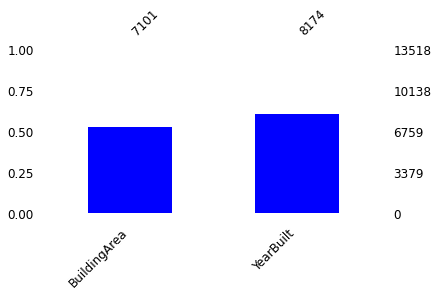

In [ ]:
#graficamos antes de imputar
msno.bar(melb_data_mice[['YearBuilt','BuildingArea']],figsize=(6, 3), sort="ascending",fontsize=12, color='b')


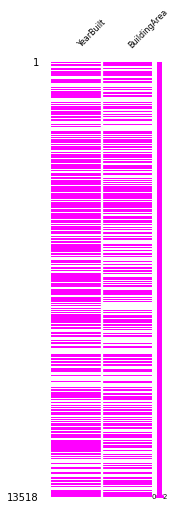

In [ ]:
msno.matrix(melb_data_mice[['YearBuilt','BuildingArea']],figsize=(2, 8),fontsize=8, color=[1,0,1])

# Imputacion con KNeighborsRegressor

In [ ]:
# usamos como semilla el valor 30 , estimador KNeighborsRegressor para las columnas 'YearBuilt','BuildingArea' y estimaremos en primer instancia con las mismas variables

mice_imputer = IterativeImputer(random_state=30, estimator=KNeighborsRegressor())
melb_data_mice_KNR[['YearBuilt','BuildingArea']] = mice_imputer.fit_transform(melb_data_mice_KNR[['YearBuilt', 'BuildingArea']])


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
#convertimos los datos standarizados a valores originales
melb_data_mice_KNR = scaler.inverse_transform(melb_data_mice_KNR)

In [ ]:
melb_data_mice_KNR = pd.DataFrame(data=melb_data_mice_KNR, columns=name_columns)

<font color=blue>Graficamos despues de la imputacion:

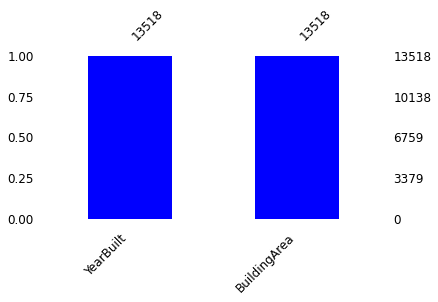

In [ ]:
msno.bar(melb_data_mice_KNR[['YearBuilt','BuildingArea']],figsize=(6, 3), sort="ascending",fontsize=12, color='blue')


<font color = blue>Entrenamos el algoritmo con todas las variables

In [ ]:

melb_data_mice_KNR_Todas = mice_imputer.fit_transform(melb_data_mice_KNR_Todas)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [ ]:
melb_data_mice_KNR_Todas = scaler_Todas.inverse_transform(melb_data_mice_KNR_Todas)

In [ ]:
melb_data_mice_KNR_Todas = pd.DataFrame(data = melb_data_mice_KNR_Todas, columns = columnas_Todas)


In [ ]:
melb_data_mice_KNR_Todas.columns

Index(['Type_h', 'Type_u', 'Type_t', 'Rooms', 'Price', 'Postcode', 'Bathroom',
       'Car', 'Landsize', 'Lattitude', 'Longtitude',
       'airbnb_monthly_price_mean', 'airbnb_weekly_price_mean', 'BuildingArea',
       'YearBuilt'],
      dtype='object')

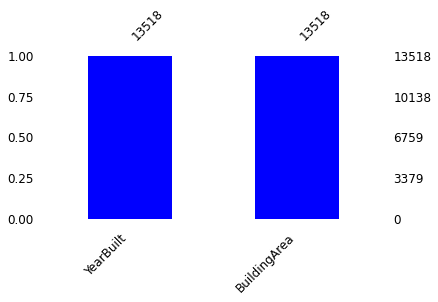

In [ ]:
msno.bar(melb_data_mice_KNR_Todas[['YearBuilt','BuildingArea']],figsize=(6, 3), sort="ascending",fontsize=12, color='b')

<font color= 'blue'> Graficos de distrubucion antes y despues de imputar

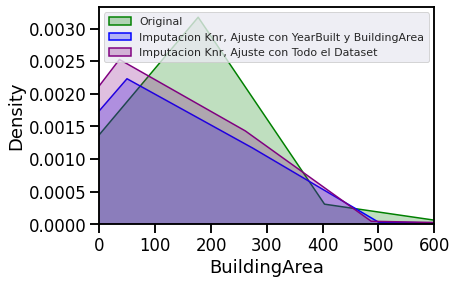

In [ ]:
import seaborn as sns

sns.kdeplot(melb_data_mice['BuildingArea'],color='green', shade=True, cbar=True)
sns.kdeplot(melb_data_mice_KNR['BuildingArea'],color='blue', shade=True, cbar=True)
sns.kdeplot(melb_data_mice_KNR_Todas['BuildingArea'], color='purple', shade=True, cbar=True)
sns.set(rc = {'figure.figsize': (15,8)})
plt.xlim(0,600)
plt.legend(labels=["Original","Imputacion Knr, Ajuste con YearBuilt y BuildingArea", "Imputacion Knr, Ajuste con Todo el Dataset"])
plt.show()


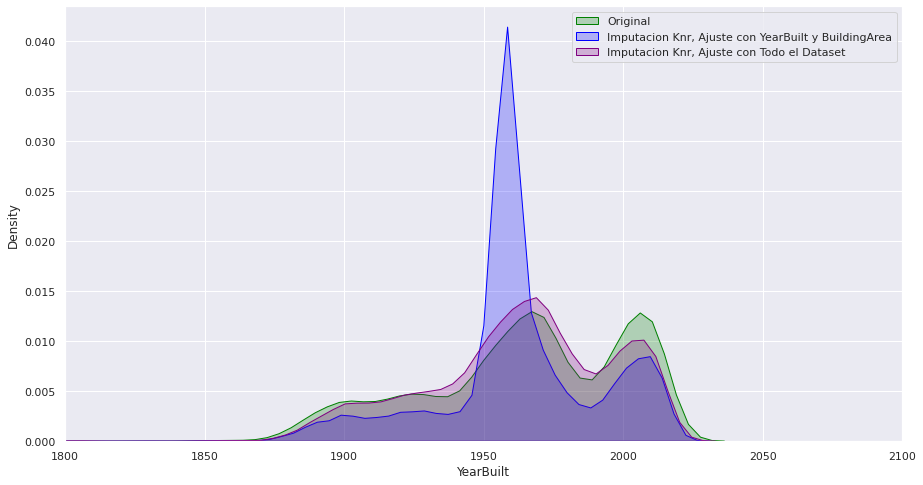

In [ ]:
sns.kdeplot(melb_data_mice['YearBuilt'],color='green', shade=True, cbar=True )
sns.kdeplot(melb_data_mice_KNR['YearBuilt'],color='blue', shade=True, cbar=True)
sns.kdeplot(melb_data_mice_KNR_Todas['YearBuilt'],color='purple', shade=True, cbar=True)
plt.xlim(1800,2100)
plt.legend(labels=["Original","Imputacion Knr, Ajuste con YearBuilt y BuildingArea", "Imputacion Knr, Ajuste con Todo el Dataset"])
sns.set(rc = {'figure.figsize': (15,8)})
plt.show()


 <font color =blue>
De las graficas obtenidas anteriormente para las columnas imputadas se puede concluir que el modelo que mejor predice es aquel que lo ejecuta con todas las variables aproximandose mas a la distribucion de la funcion original, esto se observa para ambas variables. <br> K-Nearest Neighbor es uno de los algoritmos de machine learning más simples. Su funcionamiento es el siguiente: para predecir una observación se identifican las K observaciones del conjunto de entrenamiento que más se asemejan a ella (en base a sus predictores) y se emplea como valor predicho el promedio de la variable respuesta en dichas observaciones. Dada su sencillez, suele dar peores resultados que otros algoritmos, pero es un buen referente como baseline.


In [ ]:
#agregamos las columnas imputadas obtenidas del imputador de todas las caracteristicas al Dataset obtenido del one hot encoding
melb_data_mice_knn = np.hstack([dat_enc, melb_data_mice_KNR_Todas[['BuildingArea','YearBuilt']].values])

In [ ]:
melb_data_mice_knn = pd.DataFrame(data=melb_data_mice_knn, columns=name_columns)

In [ ]:
melb_data_mice_knn.isnull().sum()

Suburb_Reservoir             0
Suburb_Richmond              0
Suburb_Bentleigh East        0
Suburb_Preston               0
Suburb_Brunswick             0
                            ..
airbnb_weekly_price_mean     0
airbnb_monthly_price_mean    0
Rooms                        0
BuildingArea                 0
YearBuilt                    0
Length: 365, dtype: int64

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.
3. En base al gráfico, seleccione las primeras $m$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos.

1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?


<font color=blue>Una forma intuitiva de entender el proceso de PCA es interpretar las componentes principales desde un punto de vista geométrico. Supóngase un conjunto de observaciones para las que se dispone de dos variables ( X1 ,  X2 ). El vector que define la primera componente principal ( Z1 ) sigue la dirección en la que las observaciones tienen más varianza (línea roja). La proyección de cada observación sobre esa dirección equivale al valor de la primera componente para dicha observación (principal component score,  zi1 ).<br> La segunda componente ( Z2 ) sigue la segunda dirección en la que los datos muestran mayor varianza y que no está correlacionada con la primera componente. La condición de no correlación entre componentes principales equivale a decir que sus direcciones son perpendiculares/ortogonales.

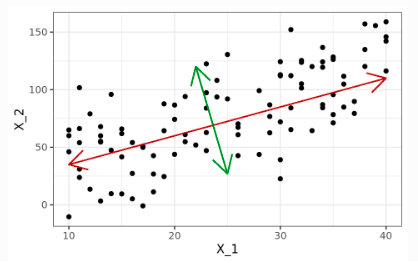

<font color=blue>Cada componente principal ( Zi ) se obtiene por combinación lineal de las variables originales. Se pueden entender como nuevas variables obtenidas al combinar de una determinada forma las variables originales. La primera componente principal de un grupo de variables ( X1 ,  X2 , ...,  Xp ) es la combinación lineal normalizada de dichas variables que tiene mayor varianza. <br>El proceso de PCA identifica las direcciones con mayor varianza. Como la varianza de una variable se mide en sus mismas unidades elevadas al cuadrado, si antes de calcular las componentes no se estandarizan todas las variables para que tengan media cero y desviación estándar de uno, aquellas variables cuya escala sea mayor dominarán al resto. De ahí que sea recomendable estandarizar siempre los datos. 


In [ ]:
#Para aplicar PCA, tomaremos el resultado obtenido en el punto 2 y acorde a la conclusion obtenida.
#Antes de comenzar exploremos un poco los datos solo de algunas variables las mas interesantes

melb_data_mice_knn.shape


(13518, 365)

In [ ]:
missing_values_count=melb_data_mice_knn.isnull().sum()
missing_values_count[missing_values_count > 0]

Series([], dtype: int64)

In [ ]:
Columnas_Interesantes=['Car', 'Landsize', 'Lattitude', 'Longtitude', 'airbnb_price_mean', 'airbnb_weekly_price_mean', 'airbnb_monthly_price_mean', 'Rooms', 'BuildingArea', 'YearBuilt']

melb_data_mice_knn[Columnas_Interesantes].mean() 


Car                            1.61
Landsize                     558.11
Lattitude                    -37.81
Longtitude                   145.00
airbnb_price_mean            131.17
airbnb_weekly_price_mean     700.05
airbnb_monthly_price_mean   2586.74
Rooms                          2.94
BuildingArea                 147.78
YearBuilt                   1963.00
dtype: float64

In [ ]:
melb_data_mice_knn[Columnas_Interesantes].var() #(axis=0)

Car                                0.93
Landsize                    15985559.74
Lattitude                          0.01
Longtitude                         0.01
airbnb_price_mean               4129.81
airbnb_weekly_price_mean      108153.78
airbnb_monthly_price_mean    1923840.87
Rooms                              0.91
BuildingArea                  179741.09
YearBuilt                       1147.59
dtype: float64

<font color = blue>Si no se estandarizan las variables para que tengan media cero y desviación estándar de uno antes de realizar el estudio PCA, las variables Landsize y airbnb_monthly_price_mean, que tiene una media y dispersión muy superior al resto, dominará la mayoría de las componentes principales, para ello utilizaremos MinMaxScaler.

In [ ]:
# Scaled max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].
from sklearn.preprocessing import  MinMaxScaler 

melb_data_mice_scalerPCA = melb_data_mice_knn.copy()
scalerPCA = MinMaxScaler(feature_range=(-1, 1)) 

melb_data_mice_scalerPCA = scalerPCA.fit_transform(melb_data_mice_scalerPCA)

melb_data_mice_PCA = pd.DataFrame(data=melb_data_mice_scalerPCA, columns=name_columns)

melb_data_mice_PCA[Columnas_Interesantes].var() #(axis=0)

Car                         0.04
Landsize                    0.00
Lattitude                   0.04
Longtitude                  0.04
airbnb_price_mean           0.03
airbnb_weekly_price_mean    0.10
airbnb_monthly_price_mean   0.09
Rooms                       0.05
BuildingArea                0.00
YearBuilt                   0.01
dtype: float64

In [ ]:
#Iniciamos PCA con n=20

from sklearn.decomposition import PCA
obj_pca = PCA(n_components=20)
obj_pca.fit(melb_data_mice_scalerPCA)
proyected_features = obj_pca.transform(melb_data_mice_scalerPCA)


In [ ]:
print("Principal components")
print(obj_pca.components_)


Principal components
[[-0.00369589  0.01120981 -0.0003959  ... -0.09997166 -0.00139637
   0.02476118]
 [ 0.02657773 -0.02555897  0.02389521 ... -0.0007119  -0.00051097
   0.02927903]
 [-0.11037144  0.00029516  0.03100808 ...  0.05813388  0.00125651
   0.01360997]
 ...
 [-0.00682707 -0.00012491  0.00644583 ...  0.00456416  0.00021104
  -0.00708672]
 [-0.10073249 -0.00023706 -0.03565583 ... -0.01714067 -0.00112212
  -0.01547775]
 [-0.10585767 -0.00874153 -0.03811638 ... -0.0060583  -0.00042538
   0.01164013]]


<font color = blue> **components_** contiene el peso/importancia que tiene cada variable en cada componente. Las filas se corresponden con las componentes principales (ordenadas de mayor a menor varianza explicada). Las columnas se corresponden con las variables de entrada.

In [ ]:
obj_pca_df=pd.DataFrame(data= obj_pca.components_, columns = melb_data_mice_PCA.columns, index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20'])
             
obj_pca_df[Columnas_Interesantes].head()



,Car,Landsize,Lattitude,Longtitude,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Rooms,BuildingArea,YearBuilt
PC1,-0.05,-0.00,-0.02,0.00,0.02,0.07,0.06,-0.10,-0.00,0.02
PC2,0.00,-0.00,0.08,-0.07,-0.08,-0.21,-0.19,-0.00,-0.00,0.03
PC3,0.03,-0.00,-0.08,0.07,0.04,0.16,0.16,0.06,0.00,0.01
PC4,-0.01,0.00,0.04,-0.02,-0.04,0.08,0.07,-0.02,-0.00,-0.01
PC5,0.01,-0.00,0.05,0.06,0.06,-0.01,-0.01,-0.01,-0.00,-0.00


<font color = blue> a modo de ejemplo (dado que tomamos algunas variables no todas para la conversion al df), se puede apreciar para la primer componente los valores de las variables airbnb_price_mean,	airbnb_weekly_price_mean,	airbnb_monthly_price_mean son las que mayor peso tienen esto indica que se recoge mayor informacion de estas variables mientras que para el PC2 es la variable Lattitude la que recoge mayor peso.

In [ ]:
print("Explained variance: ")
print(obj_pca.explained_variance_)
print("Explained variance ratio")
print(obj_pca.explained_variance_ratio_)

Explained variance: 
[1.4700343  0.47093253 0.43364316 0.39333887 0.36423618 0.34409812
 0.29745511 0.26900988 0.25461933 0.23947351 0.22876877 0.21112142
 0.19416765 0.16797233 0.16218202 0.15737733 0.13577832 0.12894498
 0.10525674 0.09963106]
Explained variance ratio
[0.14610611 0.04680579 0.04309962 0.03909379 0.03620129 0.03419977
 0.02956394 0.02673678 0.02530651 0.02380117 0.02273724 0.02098327
 0.01929824 0.0166947  0.0161192  0.01564167 0.01349495 0.01281579
 0.01046142 0.00990229]


<font color=blue>Una vez calculadas las componentes principales, se puede conocer la varianza explicada por cada una de ellas, la proporción respecto al total y la proporción de varianza acumulada. Esta información está almacenada en los atributos **explained_variance_** y **explained_variance_ratio_** del modelo. Para este caso, el PC1 obtiene un Ratio de varianza (14,61%) superior al PC2 (4,70%).

<font color = blue > Aplicaremos un escalonamiento de los datos para analizar si su prediccion es mejor a la estandarizacion realizada.

In [ ]:
# TODO Here we have to pre-process the matrix before applying PCA
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
stdandard_melb_data_mice_knn = std_scaler.fit_transform(melb_data_mice_knn)
np.max(stdandard_melb_data_mice_knn), np.min(stdandard_melb_data_mice_knn)


(116.26263372210333, -22.641991277426353)

In [ ]:
stdandard_melb_data_mice_knn.shape

(13518, 365)

In [ ]:

from sklearn.decomposition import PCA
obj_pca_std = PCA(n_components=20)
obj_pca_std.fit(stdandard_melb_data_mice_knn)
proyected_features1_std = obj_pca_std.transform(stdandard_melb_data_mice_knn)


In [ ]:
obj_pca_std.explained_variance_ratio_

array([0.01285483, 0.01068239, 0.00842262, 0.00787306, 0.00714715,
       0.00661922, 0.00630523, 0.00609461, 0.00578697, 0.00570454,
       0.00563336, 0.0056257 , 0.0056061 , 0.00556448, 0.00555553,
       0.00553632, 0.00552511, 0.00549876, 0.00549226, 0.0054824 ])

<font color=blue> En este caso para el PC1 se obtuvo un ratio de varianza de 12,85% mientras que para el PC2 fue de 1,06%.


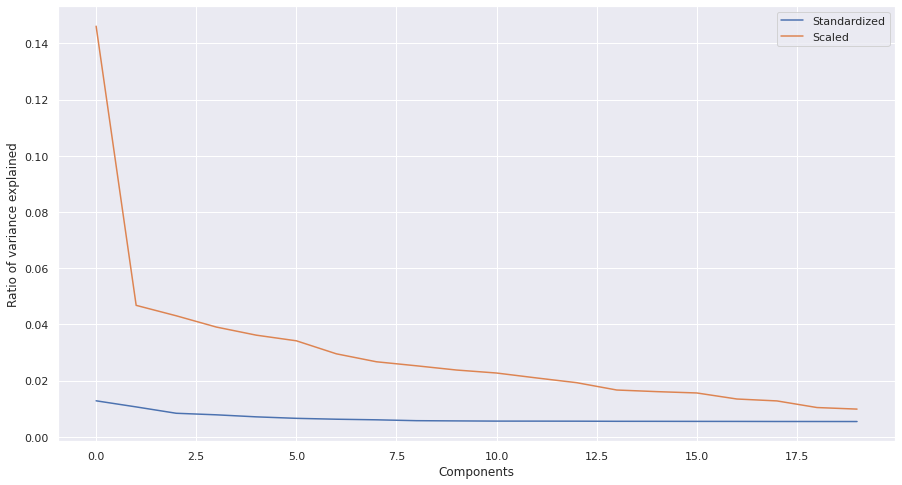

In [ ]:
#Comparamos  los ratios de varianza obtenidas para ambos metodos. 

sns.lineplot(x=range(obj_pca_std.n_components),
                 y=obj_pca_std.explained_variance_ratio_, label='Standardized')
sns.lineplot(x=range(obj_pca.n_components),
                 y=obj_pca.explained_variance_ratio_, label='Scaled')
plt.ylabel("Ratio of variance explained")
plt.xlabel("Components")
plt.legend()




<font color=blue>Se puede observar que el metodo escalonado explica mejor el comportamiento de los datos, a su vez se puede ver claramente un quiebre en la funcion que indica el numero de componentes a considerar.


In [ ]:
# por la conclusion expresada anteriormente, vamos a incorporar las dos primeras PCA como columnas al df original.
melb_data_mice_knn[['pca1_scaled', 'pca2_scaled']] = proyected_features[:,:2]  

In [ ]:
melb_data_mice_knn.shape

(13518, 367)

2. Grafique la varianza capturada por los primeros $n$ componentes principales, para cada $n$.

In [ ]:
# veremos como se comporta el precio con estas nuevas columnas incorporadas

melb_data_mice_knn.Price.describe()

count     13518.00
mean    1074796.40
std      639858.56
min       85000.00
25%      650000.00
50%      901000.00
75%     1328000.00
max     9000000.00
Name: Price, dtype: float64

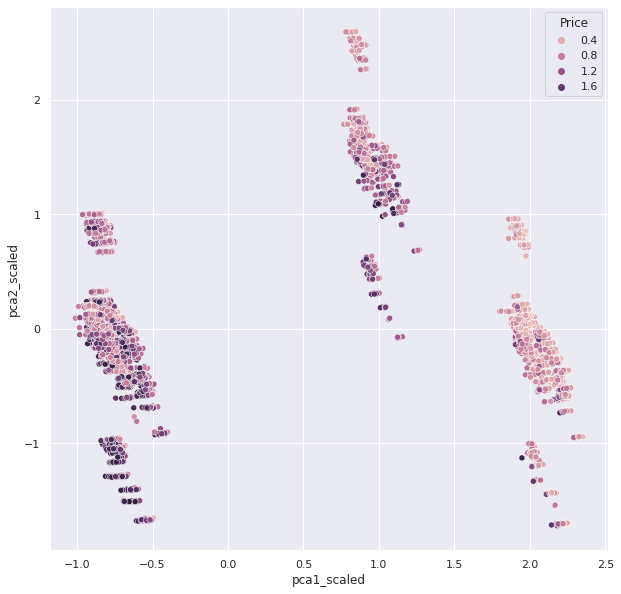

In [ ]:
# eliminaremos outliers 
data = melb_data_mice_knn[melb_data_mice_knn.Price > 100000] 
data = melb_data_mice_knn[melb_data_mice_knn.Price < 2000000] 
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='pca1_scaled', y='pca2_scaled',hue='Price')  # 'Landsize' 'Price' 'YearBuilt'


<font color = blue > se puede apreciar 3 distintos grupos de precios, habiendo una mayor concentracion en el grupo del sector izquierdo.

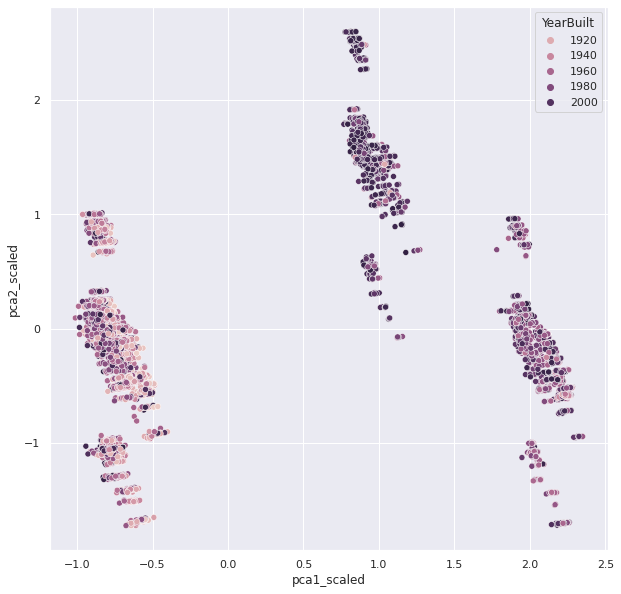

In [ ]:
# Veamos cómo se comporta YearBuild
data_year = melb_data_mice_knn[melb_data_mice_knn.YearBuilt > 1900]
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_year, x='pca1_scaled', y='pca2_scaled',hue='YearBuilt')  # 'Landsize' 'Price' 'YearBuilt'


<font color=blue>se puede apreciar un grupo importante de construcciones viejas y dos grupos de contrucciones mas modernas.

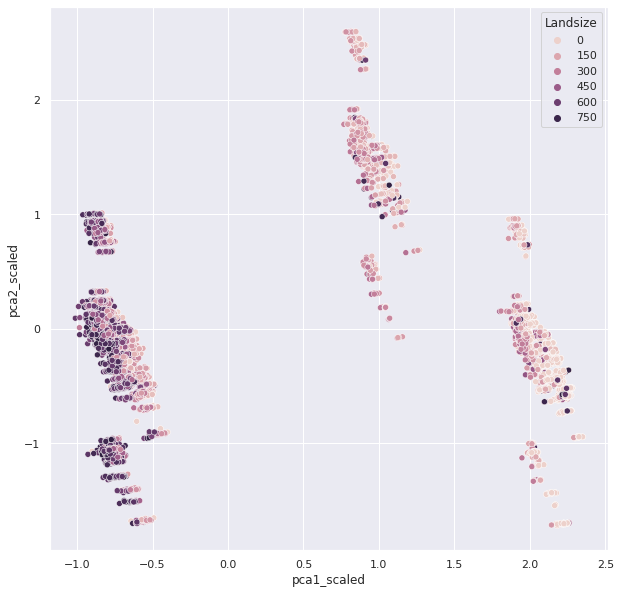

In [ ]:

# Veamos cómo se comporta el precio para ver los limites y outliers- Landsize

data_lsize = melb_data_mice_knn[melb_data_mice_knn.Landsize < 800]
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(data=data_lsize, x='pca1_scaled', y='pca2_scaled',hue='Landsize')  # 'Landsize' 'Price' 'YearBuilt'



<font color=blue> se puede ver claramente un grupo de construcciones con mayor superficie cubierta que el resto de los 2 grupos.

## Ejercicio 4: Composición del resultado

Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

Para eso, será necesario recordar el nombre original de cada columna de la matriz, en el orden correcto. Tener en cuenta:
1. El método `OneHotEncoder.get_feature_names` o el atributo `OneHotEncoder.categories_` permiten obtener una lista con los valores de la categoría que le corresponde a cada índice de la matriz.
2. Ninguno de los métodos aplicados intercambia de lugar las columnas o las filas de la matriz.

In [ ]:
# Tomamos el dataframe df utilizado como input para el enconding .


## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:

vs = df.columns.to_series().groupby(melb_df.dtypes).groups


## Small example
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

## If we process our data with the following steps:
#categorical_cols = ['Type', 'Regionname']
categorical_cols = vs[np.dtype('O')]

#numerical_cols = ['Rooms', 'Distance']
protonumeric = np.append(vs[np.dtype('float64')].values, vs[np.dtype('int64')].values)
numerical_cols = [n for n in protonumeric] 

new_columns = []

# Step 1: encode categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat = encoder.fit_transform(df[categorical_cols])
for col, col_values in zip(categorical_cols, encoder.categories_):
  for col_value in col_values:
    new_columns.append('{}={}'.format(col, col_value))
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 2: Append the numerical columns
X = np.hstack([X_cat, df[numerical_cols].values])
new_columns.extend(numerical_cols)
print("Matrix has shape {}, with columns: {}".format(X_cat.shape, new_columns))

# Step 3: Append some new features, like PCA
pca = PCA(n_components=2)
pca_dummy_features = pca.fit_transform(X)
X_pca = np.hstack([X, pca_dummy_features])
new_columns.extend(['pca1', 'pca2'])

## Re-build dataframe
processed_melb_df = pd.DataFrame(data=X_pca, columns=new_columns)
processed_melb_df.head()

Matrix has shape (13518, 352), with columns: ['Suburb=Abbotsford', 'Suburb=Aberfeldie', 'Suburb=Airport West', 'Suburb=Albanvale', 'Suburb=Albert Park', 'Suburb=Albion', 'Suburb=Alphington', 'Suburb=Altona', 'Suburb=Altona Meadows', 'Suburb=Altona North', 'Suburb=Ardeer', 'Suburb=Armadale', 'Suburb=Ascot Vale', 'Suburb=Ashburton', 'Suburb=Ashwood', 'Suburb=Aspendale', 'Suburb=Aspendale Gardens', 'Suburb=Attwood', 'Suburb=Avondale Heights', 'Suburb=Bacchus Marsh', 'Suburb=Balaclava', 'Suburb=Balwyn', 'Suburb=Balwyn North', 'Suburb=Bayswater', 'Suburb=Bayswater North', 'Suburb=Beaconsfield', 'Suburb=Beaconsfield Upper', 'Suburb=Beaumaris', 'Suburb=Bellfield', 'Suburb=Bentleigh', 'Suburb=Bentleigh East', 'Suburb=Berwick', 'Suburb=Black Rock', 'Suburb=Blackburn', 'Suburb=Blackburn North', 'Suburb=Blackburn South', 'Suburb=Bonbeach', 'Suburb=Boronia', 'Suburb=Box Hill', 'Suburb=Braybrook', 'Suburb=Briar Hill', 'Suburb=Brighton', 'Suburb=Brighton East', 'Suburb=Broadmeadows', 'Suburb=Brookfi

,Suburb=Abbotsford,Suburb=Aberfeldie,Suburb=Airport West,Suburb=Albanvale,Suburb=Albert Park,Suburb=Albion,Suburb=Alphington,Suburb=Altona,Suburb=Altona Meadows,Suburb=Altona North,...,Car,Landsize,Lattitude,Longtitude,airbnb_price_mean,airbnb_weekly_price_mean,airbnb_monthly_price_mean,Rooms,pca1,pca2
0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,202.00,-37.80,145.00,130.62,605.15,2187.03,2.00,405203.25,-450.02
1,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,156.00,-37.81,144.99,130.62,605.15,2187.03,2.00,-39796.70,-392.16
2,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,134.00,-37.81,144.99,130.62,605.15,2187.03,3.00,390203.23,-514.52
3,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,1.00,94.00,-37.80,145.00,130.62,605.15,2187.03,3.00,-224796.68,-410.98
4,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.00,120.00,-37.81,144.99,130.62,605.15,2187.03,4.00,525203.21,-560.03


In [ ]:
new_columns

['Suburb=Abbotsford',
 'Suburb=Aberfeldie',
 'Suburb=Airport West',
 'Suburb=Albanvale',
 'Suburb=Albert Park',
 'Suburb=Albion',
 'Suburb=Alphington',
 'Suburb=Altona',
 'Suburb=Altona Meadows',
 'Suburb=Altona North',
 'Suburb=Ardeer',
 'Suburb=Armadale',
 'Suburb=Ascot Vale',
 'Suburb=Ashburton',
 'Suburb=Ashwood',
 'Suburb=Aspendale',
 'Suburb=Aspendale Gardens',
 'Suburb=Attwood',
 'Suburb=Avondale Heights',
 'Suburb=Bacchus Marsh',
 'Suburb=Balaclava',
 'Suburb=Balwyn',
 'Suburb=Balwyn North',
 'Suburb=Bayswater',
 'Suburb=Bayswater North',
 'Suburb=Beaconsfield',
 'Suburb=Beaconsfield Upper',
 'Suburb=Beaumaris',
 'Suburb=Bellfield',
 'Suburb=Bentleigh',
 'Suburb=Bentleigh East',
 'Suburb=Berwick',
 'Suburb=Black Rock',
 'Suburb=Blackburn',
 'Suburb=Blackburn North',
 'Suburb=Blackburn South',
 'Suburb=Bonbeach',
 'Suburb=Boronia',
 'Suburb=Box Hill',
 'Suburb=Braybrook',
 'Suburb=Briar Hill',
 'Suburb=Brighton',
 'Suburb=Brighton East',
 'Suburb=Broadmeadows',
 'Suburb=Brookfie

In [ ]:
#Bajamos el archivo a formato csv

processed_melb_df.to_csv("processed_melb_df.csv", index=None)
from google.colab import files 
files.download('processed_melb_df.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Ejercicio 5: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas
  2. Interpretación de las columnas presentes
  2. Todas las transofrmaciones realizadas

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Se eliminan ejemplos donde el campo Car tiene valores nulos.
  2. Se asignan valores al dato CouncilArea para los registros nulos se realiza una asignacion segun codpost y a su vez para los siguientes casos, se realizado la siguiente imputacion:
Buscando en la web obtuvimos lo siguiente:
Para Suburb=Wallan - Postcode 3756 el CouncilArea es Mitchell
https://data.gov.au/search?organisation=Mitchell%20Shire%20Council
Para Suburb= New Gisborne - Postcode 3438 el CouncilArea es Shire of Macedon Ranges
https://data.gov.au/organisations/org-dga-6dedc5ae-02f3-4c38-bb9f-c4e2d028f7aa
Para Suburb= Monbulk - Postcode 3793 el CouncilArea es Yarra Ranges https://knowyourcouncil.vic.gov.au/councils/yarra-ranges

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. ...
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 30 valores más 
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Distance: Distancia al centro de la ciudad.
  3. airbnb_mean_price: Se agrega el precio promedio diario de 
     publicaciones de la plataforma AirBnB en el mismo código 
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
     Todas las características numéricas fueron estandarizadas.

  # 1. Encoding
  ## 1.1. Seleccionar todas las filas y columnas del conjunto de datos obtenido en la parte 1 del entregable, excepto BuildingArea y YearBuilt, que volveremos a imputar más adelante.
  1. Se generó un dataframe con los datos obtenidos anteriormente.
  2. Se eliminaron las columas BuildingArea y YearBuilt con la función drop(). Estas columnas serán imputadas más adelante.
  ## 1.2. Aplicar una codificación One-hot encoding a cada fila, tanto para variables numéricas como categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.
  1. Se generó una lista con las variables categóricas del dataframe c_cat = ['Suburb', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname'].  
  2. Para cada columna categóricas se codificaron sus datos con el método OneHotEncoding.
  3. Los valores codificados fueron transformados a arreglos correspondientes a cada columna.

  ### Datos aumentados
  1. Se agregan las 2 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```


```

  

```